## City Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("1.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20637 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20637.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569313,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003414,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

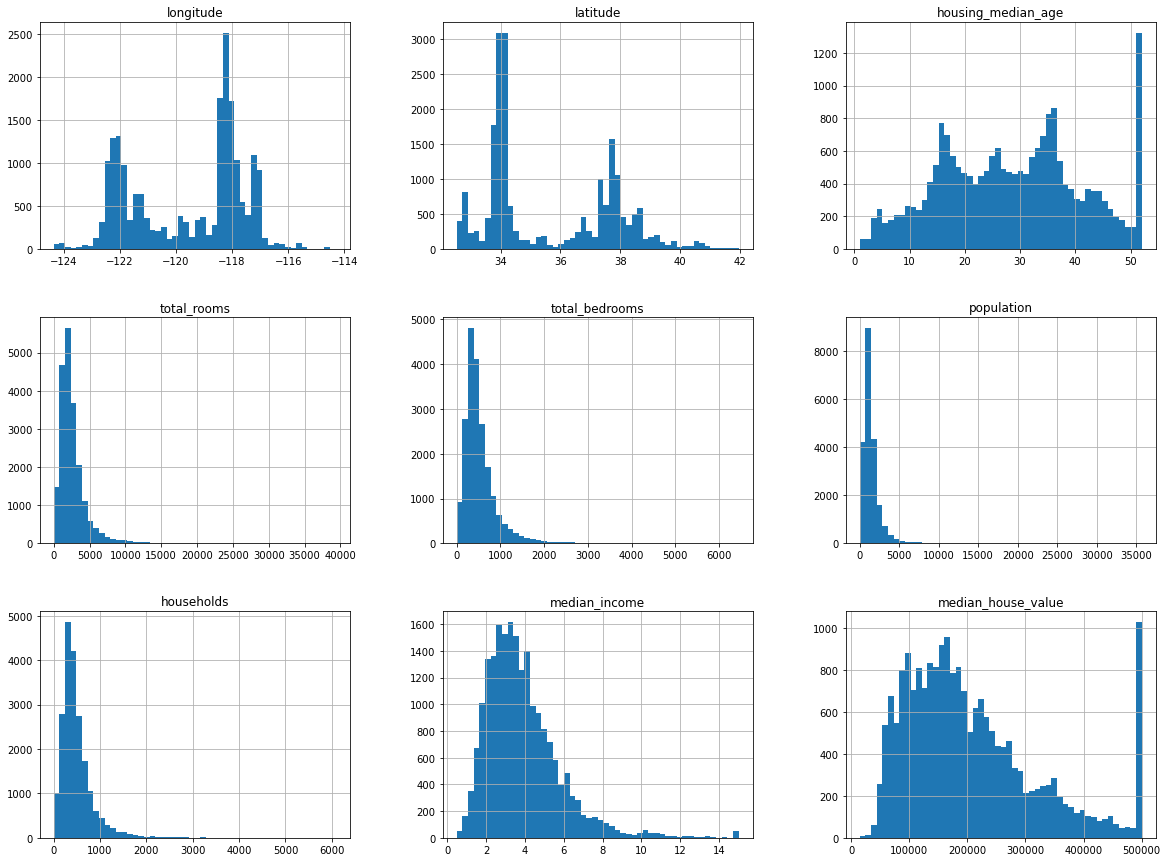

In [7]:
#For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

In [8]:
## Train-Test Splitting

In [9]:
# For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)

[20046  3024 15663 ...  5390   860 15795]


In [11]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 16512
Rows in test set: 4128



In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 16512
Rows in test set: 4128



In [13]:
test_set['median_house_value'].value_counts()

500001    179
137500     29
162500     28
225000     23
112500     21
         ... 
73700       1
145600      1
258700      1
52700       1
495600      1
Name: median_house_value, Length: 2198, dtype: int64

In [14]:
train_set['median_house_value'].value_counts()

500001    786
137500     93
162500     89
112500     82
187500     73
         ... 
399000      1
145100      1
358100      1
391000      1
412300      1
Name: median_house_value, Length: 3675, dtype: int64

In [15]:
housing = train_set.copy()

## Looking for Correlations

In [16]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046457
latitude             -0.142983
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='latitude', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='latitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='latitude'>,
        <AxesSub

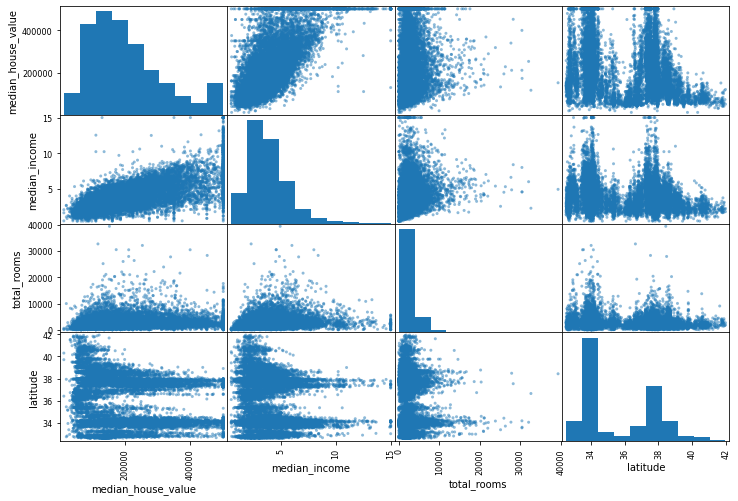

In [17]:
 from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "latitude"]
 scatter_matrix(housing[attributes], figsize = (12,8))

In [18]:
#housing.plot(kind="scatter", x="median_income", y="median_house_value ", alpha=0.8)


## Trying out Attribute combinations


In [19]:
#housing["longlat"] = housing['longitude']/housing['latitude']

In [20]:
#housing.head()

In [21]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046457
latitude             -0.142983
Name: median_house_value, dtype: float64

In [22]:
#housing.plot(kind="scatter", x="longlat", y="median_house_value", alpha=0.8)

In [23]:
housing = train_set.drop("median_house_value" , axis = 1)
housing_labels = train_set["median_house_value"].copy()

## Missing Attributes

In [24]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [25]:
a = housing.dropna(subset=["longitude"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(16509, 8)

In [26]:
housing.drop("longitude", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(16512, 7)

In [27]:
median = housing["longitude"].median() # Compute median for Option 3


In [28]:
housing["longitude"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

14196   -117.03
8267    -118.16
17445   -120.48
14265   -117.11
2271    -119.80
          ...  
11284   -117.96
11964   -117.43
5390    -118.38
860     -121.96
15795   -122.42
Name: longitude, Length: 16512, dtype: float64

In [29]:
housing.shape

(16512, 8)

In [30]:
housing.describe() # before we started filling missing attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16509.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.581803,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754
std,2.005510,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [33]:
X = imputer.transform(housing)

In [34]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [35]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.581609,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754
std,2.005380,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


## Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


## Creating a Pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [37]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [38]:
housing_num_tr.shape

(16512, 8)

## Selecting a desired model for City Real Estates

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [40]:
some_data = housing.iloc[:5]

In [41]:
some_labels = housing_labels.iloc[:5]

In [42]:
prepared_data = my_pipeline.transform(some_data)

In [43]:
model.predict(prepared_data)

array([106220., 365754., 166280.,  89487., 115925.])

In [44]:
list(some_labels)

[103000, 382100, 172600, 93400, 96500]

## Evaluating the model

In [45]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [46]:
rmse

18556.538531331174

## Using better evaluation technique - Cross Validation

In [47]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [48]:
rmse_scores

array([47577.54690273, 51851.8715602 , 48686.6822842 , 50382.2622335 ,
       51180.18025191, 47284.76576124, 46192.63033151, 51483.32658623,
       50621.35650606, 50584.01444429])

In [49]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [50]:
print_scores(rmse_scores)

Scores: [47577.54690273 51851.8715602  48686.6822842  50382.2622335
 51180.18025191 47284.76576124 46192.63033151 51483.32658623
 50621.35650606 50584.01444429]
Mean:  49584.46368618819
Standard deviation:  1887.6104357577442


Quiz: Convert this notebook into a python file and run the pipeline using Visual Studio Code

## Saving the model

In [51]:
from joblib import dump, load
dump(model, 'City.joblib') 

['City.joblib']

## Testing the model on test data

In [52]:
X_test = test_set.drop("median_house_value", axis=1)
Y_test = test_set["median_house_value"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions, list(Y_test))

In [53]:
final_rmse

49811.05179257916

In [54]:
prepared_data[0]

array([ 1.27242015, -1.3728112 ,  0.34849025,  0.22256942,  0.21122752,
        0.76827628,  0.32290591, -0.326196  ])

## Using the model

In [57]:
from joblib import dump, load
import numpy as np
model = load('City.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401 
       ]])
model.predict(features)


array([399999.39])

In [58]:
import pickle
pickle.dump(model, open('model.pkl','wb'))


In [61]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[122,37.7, 50 ,200 , 400 , 500 , 600 , 10  ]]))


[428576.33]
